## Linear Regression

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Medical Price Dataset.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking for NULL values

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df = df.copy()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [5]:
df.head(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


### Finding correlation betweeen the features

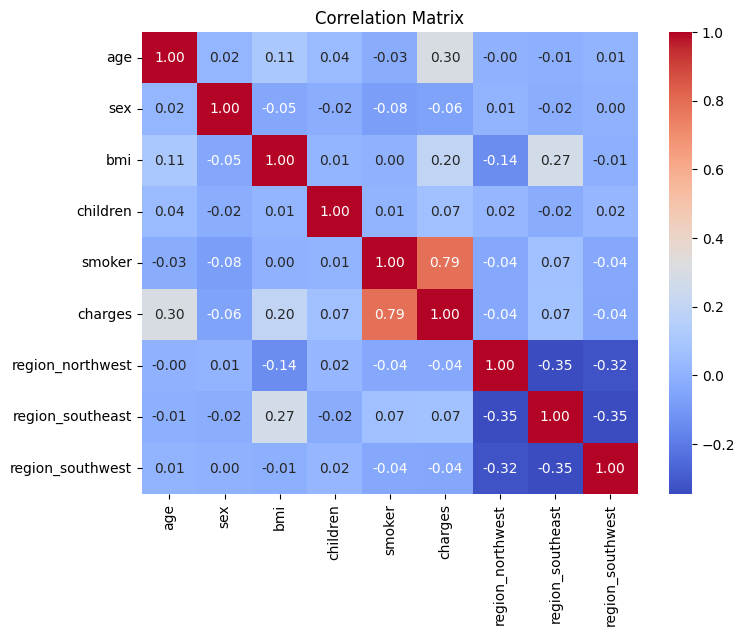

In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
df['age_bmi'] = df['age'] * df['bmi']
df['bmi_smoker'] = df['bmi'] * df['smoker']
df['age_smoker'] = df['age'] * df['smoker']
df['children_smoker'] = df['children'] * df['smoker']

charges             1.000000
bmi_smoker          0.845120
age_smoker          0.789253
smoker              0.787251
children_smoker     0.524875
age_bmi             0.334754
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
region_northwest   -0.039905
region_southwest   -0.043210
sex                -0.057292
Name: charges, dtype: float64


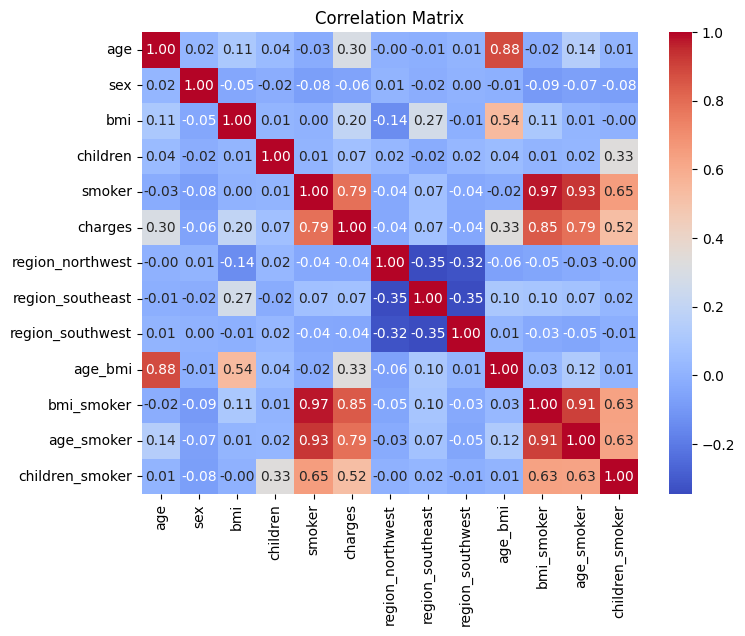

In [8]:
corr_matrix = df.corr()['charges']
print(corr_matrix.sort_values(ascending=False))

corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest', 'age_bmi',
       'bmi_smoker', 'age_smoker', 'children_smoker'],
      dtype='object')

In [10]:
df.drop(['age', 'sex', 'bmi', 'children','region_northwest', 'region_southeast', 'region_southwest', 'age_bmi', 'smoker'], axis = 1, inplace = True)

In [11]:
df.head(5)

,charges,bmi_smoker,age_smoker,children_smoker
0,16884.92400,27.9,19,0
1,1725.55230,0.0,0,0
2,4449.46200,0.0,0,0
3,21984.47061,0.0,0,0
4,3866.85520,0.0,0,0


In [12]:
features = df.columns
X = df[features].values
y = df['charges'].values.reshape(-1, 1)

In [13]:
X.shape

(1338, 4)

In [14]:
y.shape

(1338, 1)

### Splitting the dataset

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the data

In [16]:
std_devs = X_train.std(axis=0)
non_zero_std_indices = std_devs > 0

X_train = X_train[:, non_zero_std_indices]
X_test = X_test[:, non_zero_std_indices]

# Now scale
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

# Add intercept column
X_train_scaled = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
X_test_scaled = np.hstack([np.ones((X_test_scaled.shape[0], 1)), X_test_scaled])

### 

### Designing the linear regression function

In [17]:
def train_linear_regression(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    for i in range(iterations):
        predictions = X @ theta
        error = predictions - y
        gradient = (1/m) * (X.T @ error)
        theta -= lr * gradient
        
        # Optional: print loss every 100 iterations
        if i % 100 == 0:
            loss = (1/(2*m)) * np.sum(error**2)
            print(f"Iteration {i}: Loss = {loss:.4f}")
    
    return theta

In [19]:
theta = train_linear_regression(X_train_scaled, y_train, lr=0.01, iterations=3000)

print("\nLearned parameters (theta):")
print(theta.flatten())

# Predictions on test set
y_pred = X_test_scaled @ theta

# Evaluate with RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print(f"\nTest RMSE: {rmse:.2f}")

Iteration 0: Loss = 161225866.5921
Iteration 100: Loss = 19904269.5804
Iteration 200: Loss = 6085485.8692
Iteration 300: Loss = 2937850.0930
Iteration 400: Loss = 1756687.3478
Iteration 500: Loss = 1132038.0836
Iteration 600: Loss = 751240.5827
Iteration 700: Loss = 506535.9474
Iteration 800: Loss = 345595.5659
Iteration 900: Loss = 238347.8664
Iteration 1000: Loss = 166205.1204
Iteration 1100: Loss = 117277.3370
Iteration 1200: Loss = 83820.5679
Iteration 1300: Loss = 60738.5155
Iteration 1400: Loss = 44654.9500
Iteration 1500: Loss = 33322.1720
Iteration 1600: Loss = 25237.3661
Iteration 1700: Loss = 19391.3786
Iteration 1800: Loss = 15103.2758
Iteration 1900: Loss = 11911.0047
Iteration 2000: Loss = 9498.9463
Iteration 2100: Loss = 7649.8105
Iteration 2200: Loss = 6212.6251
Iteration 2300: Loss = 5081.3839
Iteration 2400: Loss = 4180.7638
Iteration 2500: Loss = 3456.5384
Iteration 2600: Loss = 2869.1169
Iteration 2700: Loss = 2389.1662
Iteration 2800: Loss = 1994.6279
Iteration 2900

In [22]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred)
print("R2 Score:", accuracy)

R2 Score: 0.9999837410047988
